In [2]:
import numpy as np
import os
import matplotlib
from pyevtk.hl import gridToVTK
import tables
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import glob
import pandas as pd

In [3]:
f_ca = 266780.566449859
f_ci =  0.19933402462820632

In [4]:
def save_to_vtk(data, filepath, n, binSize ):
    """
    save the 3d data to a .vtk file. 
    
    Parameters
    ------------
    data : 3d np.array
        3d matrix that we want to visualize
    filepath : str
        where to save the vtk model, do not include vtk extension, it does automatically
    """
    x = np.arange( 0, n+1, 1) * binSize
    y = np.arange( 0, n+1, 1) * binSize
    z = np.arange( 0, n+1, 1) * binSize
    gridToVTK(filepath, x, y, z, cellData={'data':data.copy()})

In [31]:
# Factors for Quantification Factor
h5_file = '/Users/eframe/Downloads/phantom_comp_05_250.h5'
outfile = '/Users/eframe/Downloads/phantom_comp_05_250.'
f = tables.open_file(file, 'r')
A_218 = f.root.image.read() * 8.207542473478681e-05 * 37
f.close()

binsize = 1
sourceX, sourceY, sourceZ = np.mgrid[ -25:26:binsize, -16:17:binsize, -25:26:binsize ] 
sourcePixels = np.array( [ sourceX.flatten(), sourceY.flatten(), sourceZ.flatten() ] ).T
data = A_218.reshape( sourceX.shape ) 
data2 = data.copy()
data3 = data2.copy()
data3 = np.pad(data3, 4)
data3 = data3[8:-10,:,9:-9]
data3 = np.fliplr( data3 )
data3[data3<1e-5]=1e-5
print( data.shape, data2.shape, data3.shape )
# data3.astype(np.float32).tofile('/Users/eframe/dmi/data/mouseBROI/mouseB_coded.bin')

(51, 33, 51) (51, 33, 51) (41, 41, 41)


In [32]:
save_to_vtk( data3, outfile, data3.shape[2], binsize)

16


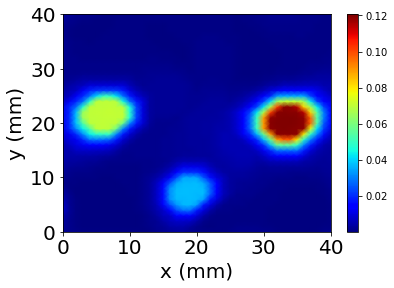

In [28]:
#Display Image 
%matplotlib inline
data4 = data3.max(1)
a, b = min( data4.flatten() ), max( data4.flatten() )
for i in np.arange( 16, 17 ):
    fig, ax = plt.subplots()
    grid = data4
    im = ax.pcolormesh(  grid.T, vmin=a, vmax=b, cmap='jet', shading='gouraud') 
    ax.set_xlabel( 'x (mm)', fontsize = 20 )
    ax.set_ylabel( 'y (mm)', fontsize = 20 )
    ax.tick_params( labelsize = 20 )
    cbar = plt.colorbar( im )
    print(i)
    plt.show()

16


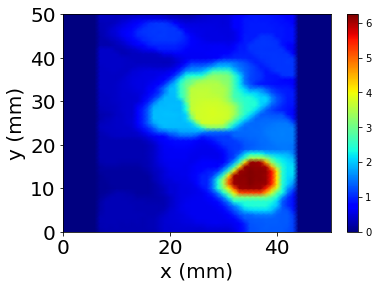

In [37]:
# Display Image 
%matplotlib inline
data4 = np.zeros_like( data3 )
data4[:,:,15] = data3.max(2)
data4[:,:,16] = data3.max(2)
data4[:,:,17] = data3.max(2)
a, b = min( data4.flatten() ), max( data4.flatten() )
for i in np.arange( 16, 17 ):
    fig, ax = plt.subplots()
    grid = data4[:,:,i]
    im = ax.pcolormesh(  grid.T, vmin=a, vmax=b, cmap='jet', shading='gouraud') 
    ax.set_xlabel( 'x (mm)', fontsize = 20 )
    ax.set_ylabel( 'y (mm)', fontsize = 20 )
    ax.tick_params( labelsize = 20 )
    cbar = plt.colorbar( im )
    print(i)
    plt.show()

In [13]:
# # Mouse Display Image 
# %matplotlib inline
# tumor = data3[25:41, 2:17, 15:31].sum(2) # mouse A CA
# central = data3[15:35, 18:38, 14:35].sum(2) # mouse A CA

# tumor = data3[28:39, 16:30, 19:33].sum(1) # mouse B CA
# central = data3[11:34, 26:50, 20:41].sum(2) # mouse B CA

# tumor = data3[25:37, 2:15, 16:29].sum(1) # mouse A COMP
# central = data3[11:30, 18:34, 12:28].sum(2) # mouse A COMP

# tumor = data3[27:38, 13:24, 16:27].sum(2) # mouse B COMP
# central = data3[10:33, 25:40, 12:35].sum(1) # mouse B COMP

# val = tumor.copy()
# a, b = min( val.flatten() ), max( val.flatten() )
# for i in np.arange( 16, 17 ):
#     fig, ax = plt.subplots()
#     print( val.sum() )
#     grid = val
#     im = ax.pcolormesh(  grid.T, vmin=a, vmax=b, cmap='jet', shading='gouraud') 
#     ax.set_xlabel( 'x (mm)', fontsize = 20 )
#     ax.set_ylabel( 'y (mm)', fontsize = 20 )
#     ax.tick_params( labelsize = 20 )
#     cbar = plt.colorbar( im )
#     print(i)
#     plt.show()

0


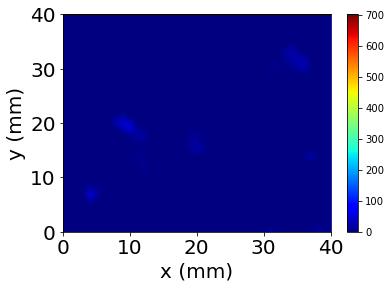

1


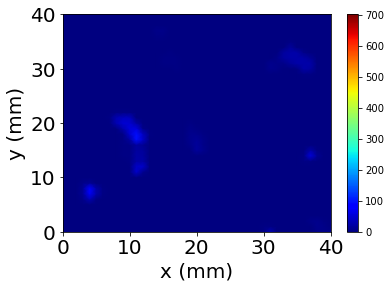

2


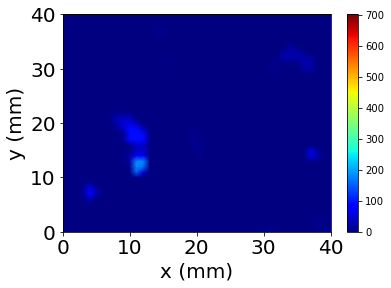

3


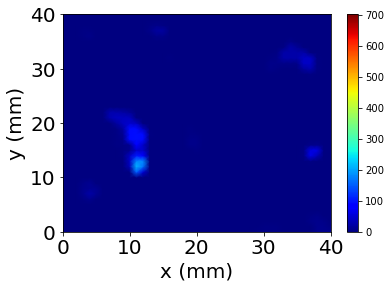

4


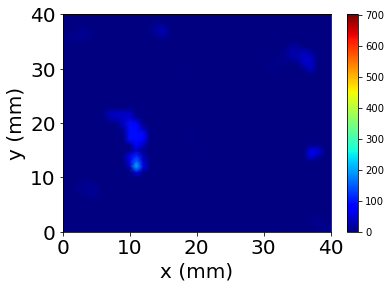

5


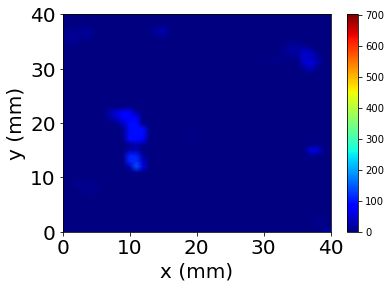

6


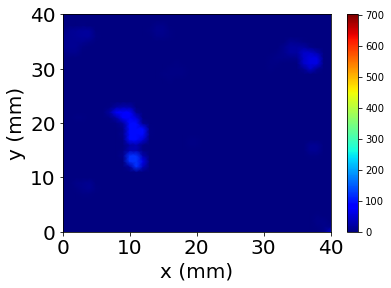

7


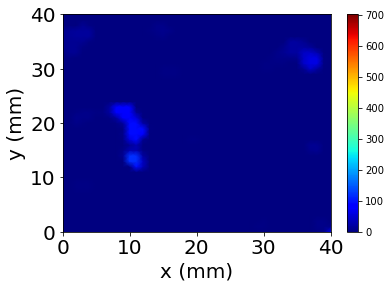

8


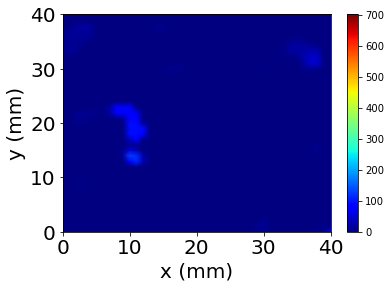

9


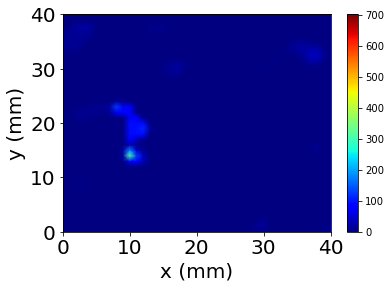

10


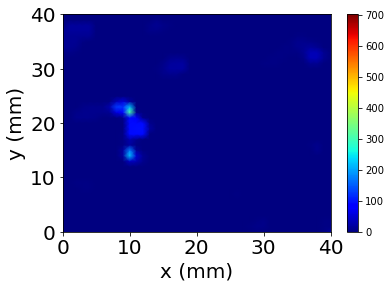

11


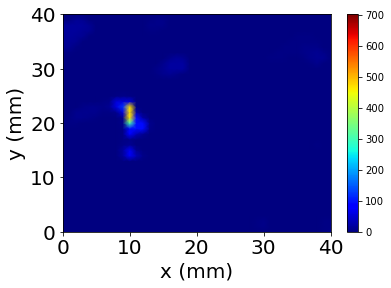

12


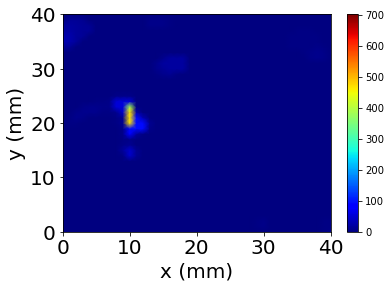

13


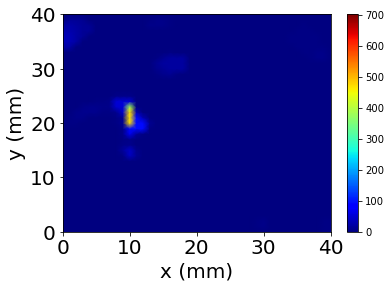

14


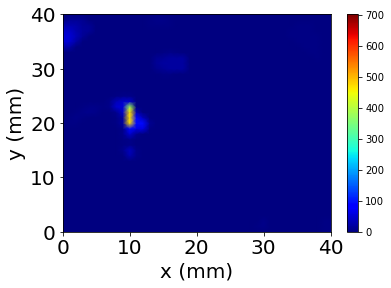

15


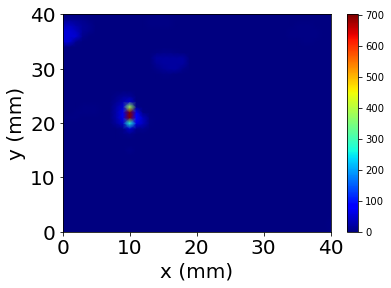

16


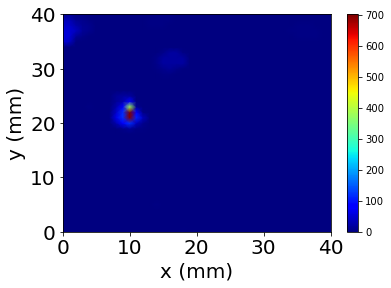

17


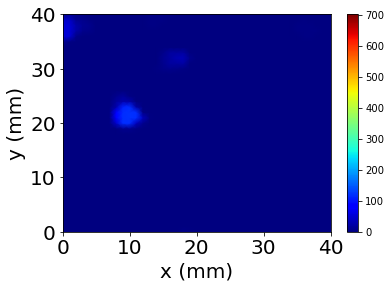

18


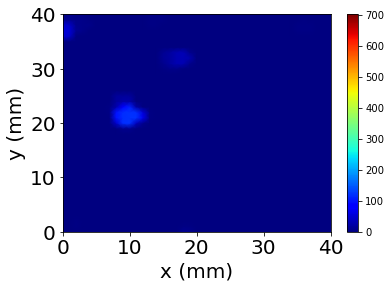

19


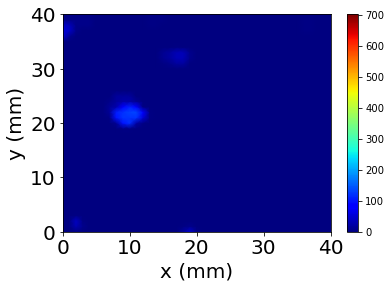

20


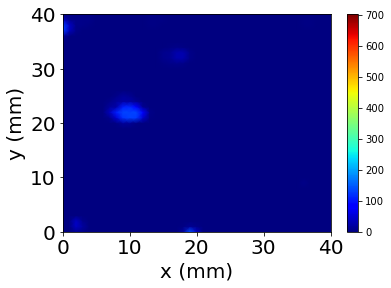

21


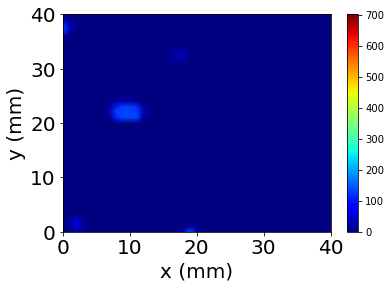

22


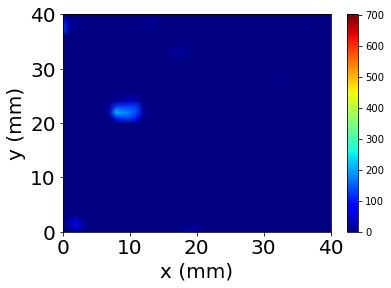

23


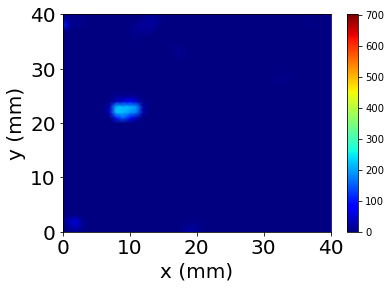

24


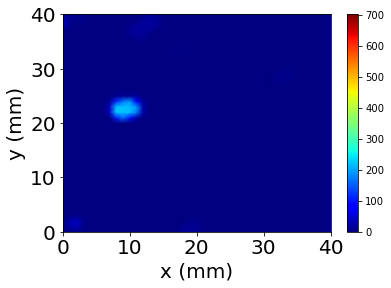

25


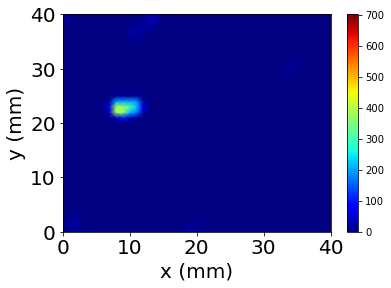

26


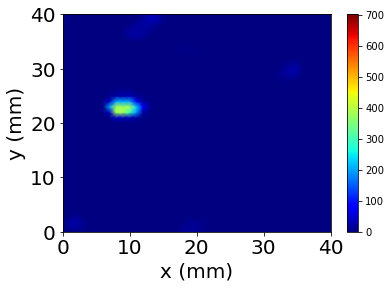

27


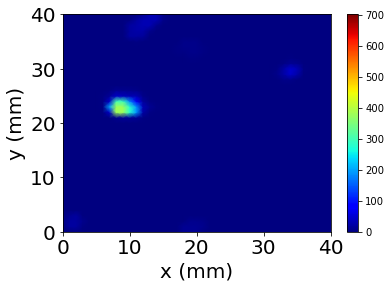

28


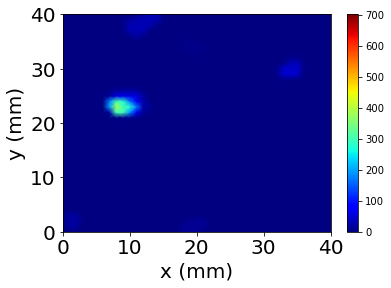

29


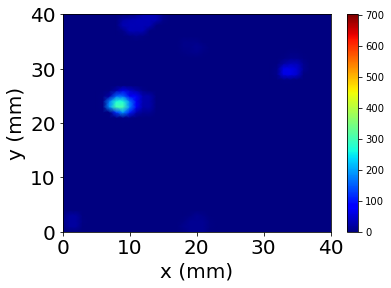

30


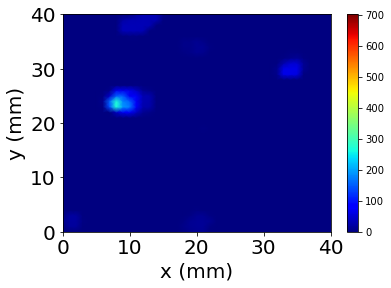

31


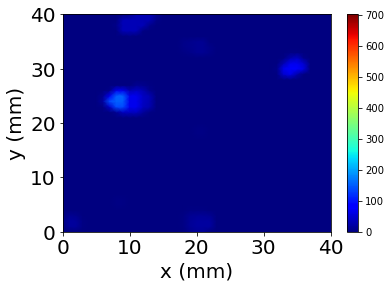

32


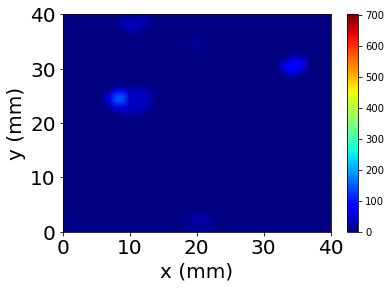

33


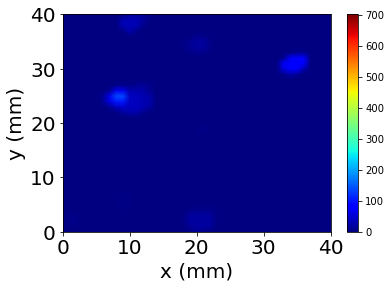

34


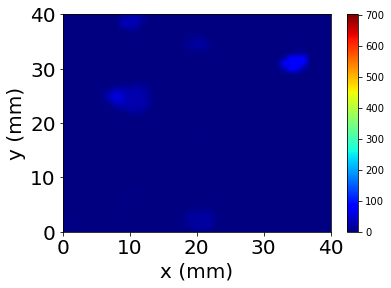

35


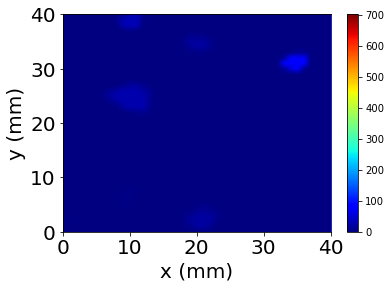

36


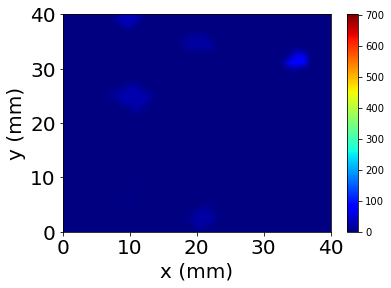

37


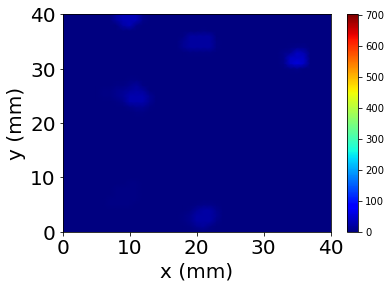

38


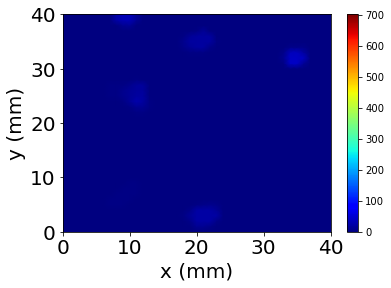

39


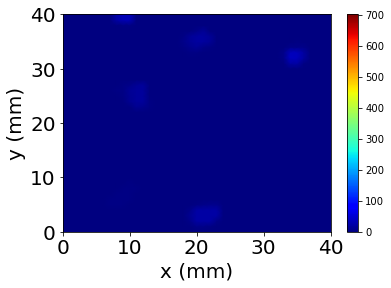

40


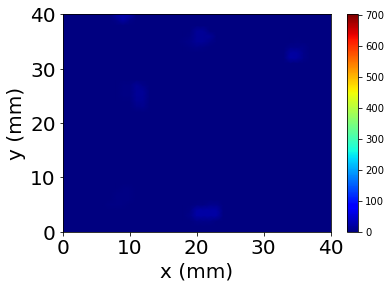

In [239]:
# Display Image 
%matplotlib inline
a, b = min( data3.flatten() ), max( data3.flatten() )
for i in np.arange( data3.shape[2] ):
    fig, ax = plt.subplots()
    grid = data3[:,:,i]
    im = ax.pcolormesh(  grid.T, vmin=b, vmax=a, cmap='jet', shading='gouraud') 
    ax.set_xlabel( 'x (mm)', fontsize = 20 )
    ax.set_ylabel( 'y (mm)', fontsize = 20 )
    ax.tick_params( labelsize = 20 )
    cbar = plt.colorbar( im )
    print(i)
    plt.show()

In [ ]:
# Factors for Quantification Factor
t = 120 * 8 * 60 # 60 min (A), 120 min (B)
d = 1.3 # radius of falcon tube for attenuation (cm)
u_218 = 0.1330 * 1 # cm-1
r_218 = 95 + 50 # mm
dead_218 = 0 
decay_corr = np.exp( -lam * 4 ) # 2 (A), 4 (B)

file = '/Users/eframe/Downloads/mouseB_coded.h5'
outfile = '/Users/eframe/Downloads/mouseB_coded'
f = tables.open_file(file, 'r')
I_218 = f.root.image.read() / decay_corr

A_218 = I_218.copy() / ( f_ca * np.exp( -u_218 * d ) * ( 1 / r_218 ** 2 ) * t * ( 1 - dead_218 ) )
f.close()

ID_cc = A_218 / 20000 * ( 1 / 0.001 ) * 100  

binsize = 1
sourceX, sourceY, sourceZ = np.mgrid[ -18:19:binsize, -32:33:binsize, -18:19:binsize ]
sourcePixels = np.array( [ sourceX.flatten(), sourceY.flatten(), sourceZ.flatten() ] ).T
data = ID_cc.reshape( sourceX.shape ) 
data2 = data.copy()
data3 = data2.copy()
data3 = np.pad(data3, 4)
data3 = data3[:,18:-10,:]
data3 = np.rot90( np.rot90( data3 ) )
print( data.shape, data2.shape, data3.shape )
# data3.astype(np.float32).tofile('/Users/eframe/dmi/data/mouseBROI/mouseB_coded.bin')

In [ ]:
t = 70 * 8 * 60 # 75 (A), 70 (B)
d = 1.3
u_440 = 0.1021 * 1 # cm-1
r_440 = 36 # mm
dead_440 = 0.1 # 0.22 (A), 0.1 (B)
lam = np.log(2) / 10
decay_corr = np.exp( -lam * 6 ) # 4 (A), 6 (B)
bp_fact = 0.90 # 0.92 (A), 0.90 (B)

file = '/Users/eframe/Downloads/mouseB_comp.h5'
outfile = '/Users/eframe/Downloads/mouseB_comp_mip'
f = tables.open_file(file, 'r')
I_440 = f.root.image.read() / decay_corr

A_440 = I_440.copy() / ( f_ci * np.exp( -u_440 * d ) * \
                        ( 1 / r_440 ** 2 ) * t * ( 1 - dead_440 ) * bp_fact )

ID_cc = A_440 / 20000 * ( 1 / 0.001 ) * 100  

f.close()

binsize = 1
sourceX, sourceY, sourceZ = np.mgrid[ -20:21:binsize, -35:36:binsize, -20:21:binsize ]
sourcePixels = np.array( [ sourceX.flatten(), sourceY.flatten(), sourceZ.flatten() ] ).T
xcoord = sourcePixels[:,0]
zcoord = sourcePixels[:,2]
mask = np.sqrt( xcoord**2 + zcoord**2 ) > 20
ID_cc[mask] = 0
data = ID_cc.reshape( sourceX.shape ) 
data2 = data.copy()
data3 = np.fliplr( data2.copy() )
data3 = np.rot90(np.rot90(data3))
data3 = np.pad(data3, 5)
data3 = data3[:,15:-15,:]
print( data.shape, data2.shape, data3.shape )
# data3.astype(np.float32).tofile('/Users/eframe/dmi/data/mouseBROI/mouseB_comp.bin')